<a href="https://colab.research.google.com/github/erjavaid/ensemble-technique/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
df=pd.read_csv('TSLA.CSV')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,758.000000,758.000000,758.000000,758.000000,7.580000e+02,758.0,758.000000
mean,485.876984,497.135347,473.316225,485.531513,4.693252e+07,0.0,0.006596
std,353.897173,361.762103,344.581855,353.160353,3.393843e+07,0.0,0.181608
min,36.220001,37.335999,35.397999,35.793999,9.800600e+06,0.0,0.000000
25%,113.061998,115.117502,109.650499,112.323500,2.431762e+07,0.0,0.000000
50%,485.494995,501.315002,458.930008,488.125000,3.448050e+07,0.0,0.000000
75%,766.029984,779.285019,748.804977,762.142502,6.008200e+07,0.0,0.000000
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08,0.0,5.000000


In [6]:
stock_data=df[['Date', 'Close']]

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [8]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

/tmp/ipython-input-3223040857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data['Date'])


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [10]:
# make Date as an index:easily data rerive,easy visual,reuired date as column
stock_data.set_index('Date',inplace=True)


In [11]:
#EDA
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [12]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


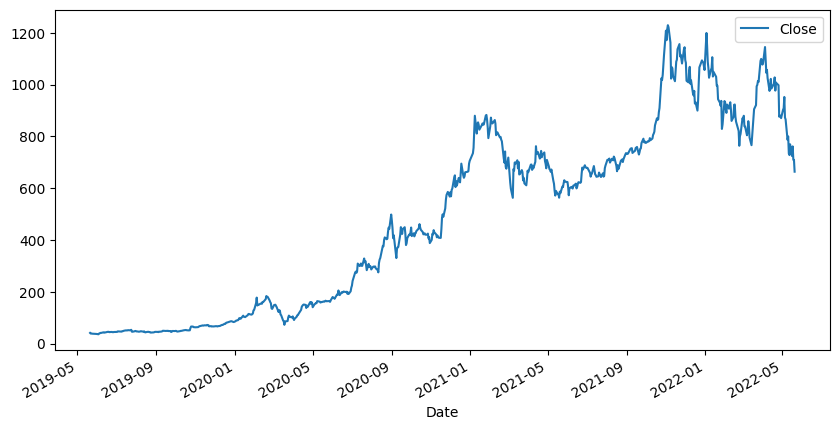

In [13]:
stock_data.plot(figsize=(10,5))
plt.show()

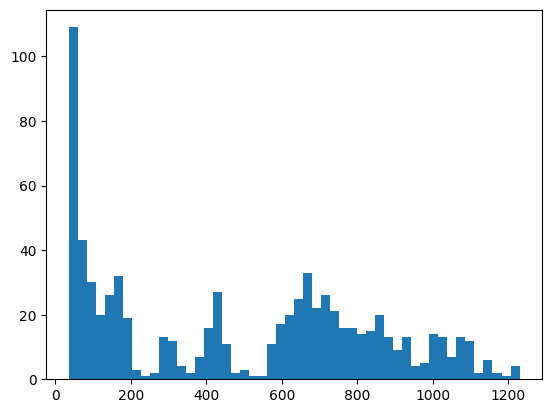

In [14]:
plt.hist(stock_data['Close'],bins=50)
plt.show()

/tmp/ipython-input-3478092526.py:9: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(stock_data['Close'],linewidth=2,color='blue')


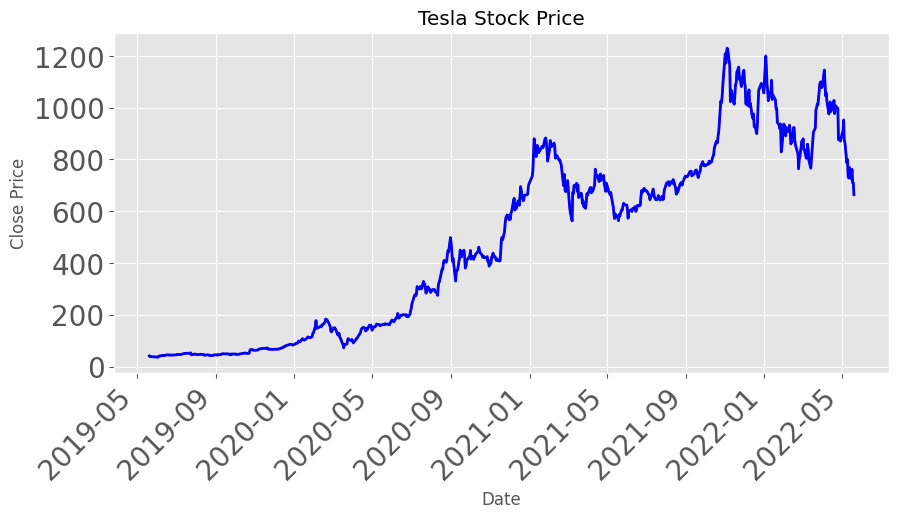

In [15]:
# plotting close price
plt.style.use('ggplot')
stock_data['Close'].plot(figsize=(10,5))
plt.grid(True)
plt.xlabel('Date')
plt.xticks(rotation=45,fontsize=20)
plt.ylabel('Close Price')
plt.yticks(fontsize=20)
plt.plot(stock_data['Close'],linewidth=2,color='blue')
plt.title('Tesla Stock Price')

plt.show()

In [16]:
# now smooth the graph using moving average
rollmean=stock_data['Close'].rolling(window=13).mean()



In [17]:
# using starndard deviation
rollstd=stock_data['Close'].rolling(window=13).std()


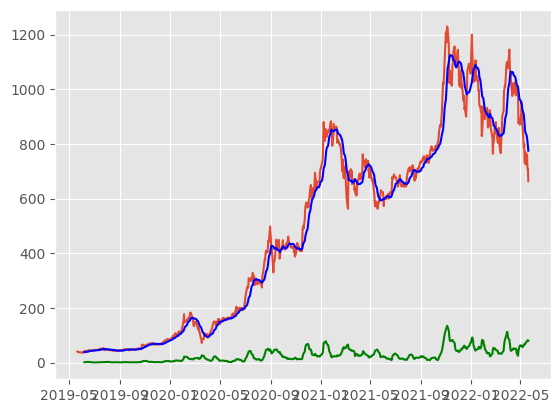

In [18]:
plt.plot(stock_data.Close)
plt.plot(rollmean,'b')
plt.plot(rollstd,'g')
plt.grid(True)
plt.show()

In [19]:
# check for non stationary  using adfullar
from statsmodels.tsa.stattools import adfuller


In [20]:
adful=adfuller(stock_data['Close'])

In [21]:
pd.Series(adful[:4],index=['test_sta','p_value','lags','nobs'])

,0
test_sta,-1.363009
p_value,0.599876
lags,9.000000
nobs,748.000000


In [26]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rollmean=timeseries.rolling(window=13).mean()
    rollstd=timeseries.rolling(window=13).std()
    # plot rolling statistics
    plt.plot(timeseries,color='blue',label='original')
    plt.plot(rollmean,color='red',label='rolling mean')
    plt.plot(rollstd,color='green',label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("result")
    adful=adfuller(timeseries,autolag='AIC')
    print(pd.Series(adful[:4],index=['test_sta','p_value','lags','nobs']))
    output=pd.Series(adful[:4],index=['test_sta','p_value','lags','nobs'])
    for key,value in adful[4].items():
        output['critical value (%s)'%key]=value
    print(output)



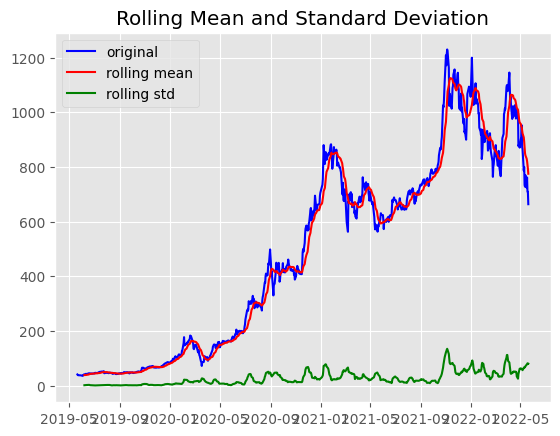

result
test_sta     -1.363009
p_value       0.599876
lags          9.000000
nobs        748.000000
dtype: float64
test_sta                 -1.363009
p_value                   0.599876
lags                      9.000000
nobs                    748.000000
critical value (1%)      -3.439123
critical value (5%)      -2.865412
critical value (10%)     -2.568832
dtype: float64


In [27]:
test_stationarity(stock_data['Close'])

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
result=seasonal_decompose(stock_data[['Close']],model='additive',period=12)

In [30]:
result.seasonal


,seasonal
Date,
2019-05-21,-2.346452
2019-05-22,3.768884
2019-05-23,-0.777006
2019-05-24,-0.654226
2019-05-28,-2.737845
...,...
2022-05-16,2.149519
2022-05-17,1.323680
2022-05-18,1.837638


<Figure size 1000x500 with 0 Axes>

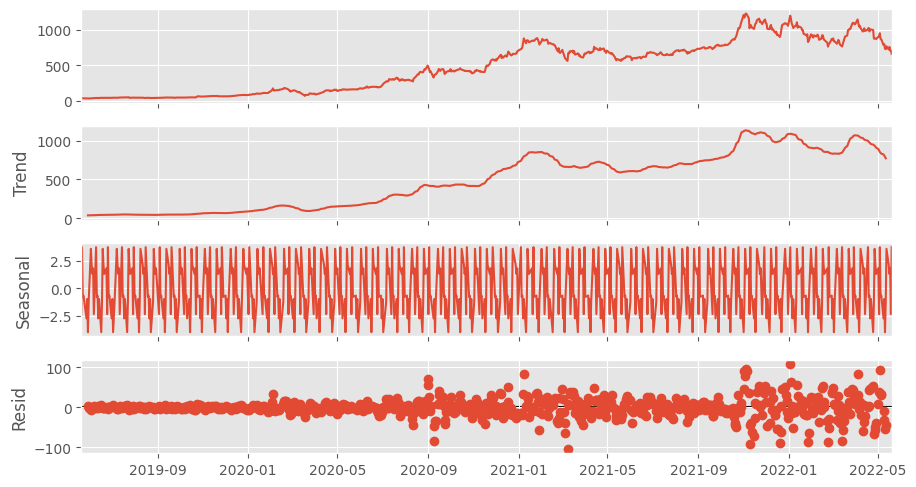

In [33]:
# plot
fig=plt.figure(figsize=(10,5))
fig=result.plot()
fig.set_size_inches(10,5)
plt.show()

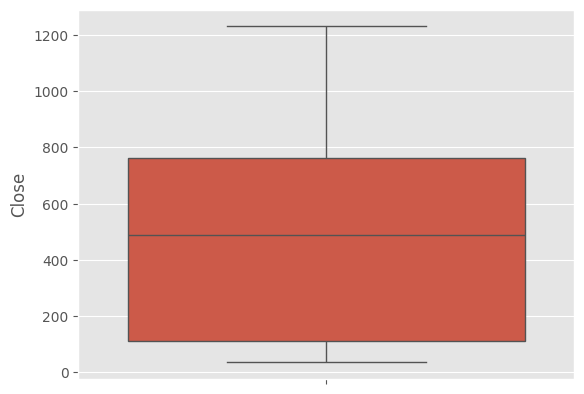

In [41]:
# outlier or not
import seaborn as sns
sns.boxplot(stock_data['Close'])
plt.show()

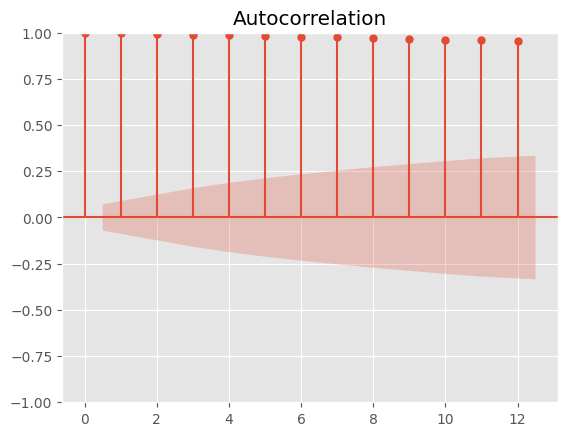

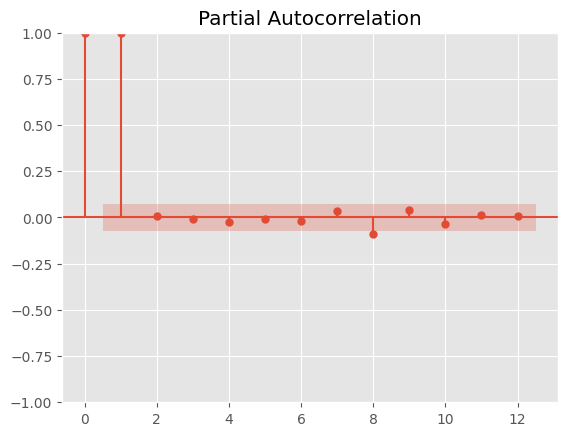

In [34]:
# acf and pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(stock_data['Close'],lags=12)
pacf=plot_pacf(stock_data['Close'],lags=12)
plt.show()

In [35]:
# convert into non stationary into stationary
df_close=stock_data['Close']

In [36]:
df_close

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [39]:
# use differencing
df_close=df_close.diff(7)

In [40]:
df_close

,Close
Date,
2019-05-21,NaN
2019-05-22,NaN
2019-05-23,NaN
2019-05-24,NaN
2019-05-28,NaN
...,...
2022-05-16,34.119934
2022-05-17,44.869995
2022-05-18,26.740051


In [41]:
df_closef=df_close.dropna()

In [42]:
df_closef

,Close
Date,
2019-06-03,1.231995
2019-06-04,2.374004
2019-06-05,1.570000
2019-06-06,2.257996
2019-06-07,-0.521996
...,...
2022-05-16,34.119934
2022-05-17,44.869995
2022-05-18,26.740051


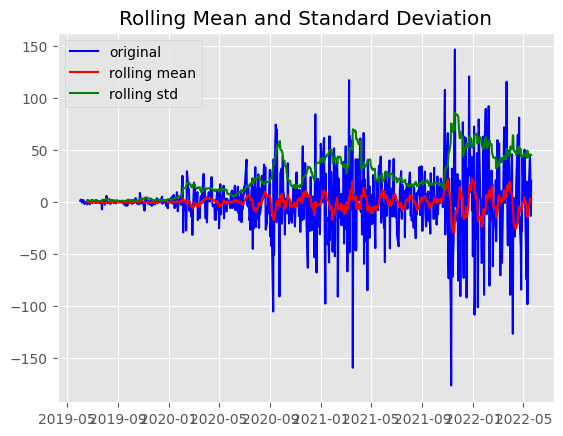

result
test_sta   -9.095370e+00
p_value     3.727489e-15
lags        2.000000e+01
nobs        7.290000e+02
dtype: float64
test_sta               -9.095370e+00
p_value                 3.727489e-15
lags                    2.000000e+01
nobs                    7.290000e+02
critical value (1%)    -3.439352e+00
critical value (5%)    -2.865513e+00
critical value (10%)   -2.568886e+00
dtype: float64


In [43]:
test_stationarity(df_closef)

In [44]:
# build model
test=df_closef[-60:]


In [45]:
train=df_closef[:-60]

In [46]:
train

,Close
Date,
2019-06-03,1.231995
2019-06-04,2.374004
2019-06-05,1.570000
2019-06-06,2.257996
2019-06-07,-0.521996
...,...
2022-02-17,-61.700012
2022-02-18,-29.369995
2022-02-22,-7.999939


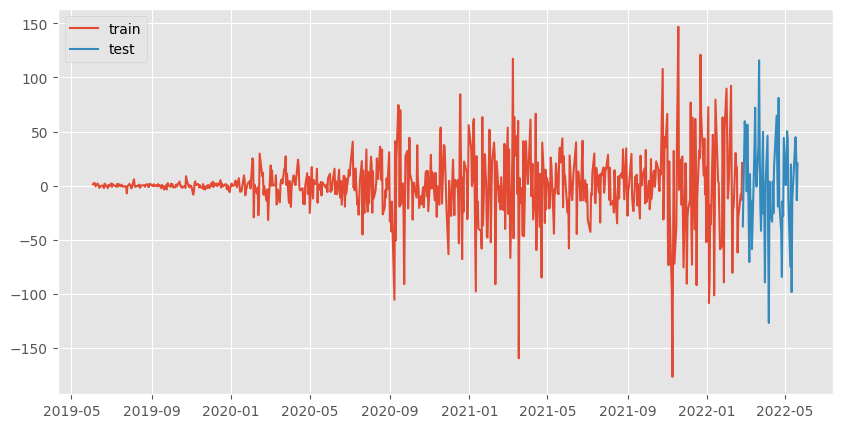

In [47]:
plt.figure(figsize=(10,5))
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.legend()
plt.show()

In [48]:
# use time series algorithm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [49]:
history=[x for x in train]

In [50]:
history

[1.23199462890625,
 2.3740043640136648,
 1.5699996948242188,
 2.25799560546875,
 -0.5219955444335866,
 2.003997802734375,
 1.4559974670410156,
 -0.32999420166015625,
 -1.996002197265625,
 -0.3959999084472656,
 0.15000152587891336,
 0.23199844360350852,
 -1.3380012512207031,
 -2.2059974670410156,
 2.0159988403320312,
 -0.5740013122558594,
 -0.9780006408691406,
 -2.1199989318847656,
 0.7719993591308594,
 -0.21399688720703125,
 2.103996276855476,
 -0.9720001220703196,
 1.7140007019042969,
 0.4160003662109375,
 -0.4539985656738281,
 -0.7700004577636719,
 1.6479988098144602,
 -0.8059959411621236,
 1.8199958801269602,
 -0.3859977722167969,
 0.1360015869140625,
 1.0479965209960938,
 -0.20800018310546875,
 -0.8439979553222727,
 -0.43600082397460227,
 -0.397998809814446,
 -0.7420005798339915,
 -6.988002777099602,
 -0.6519966125488352,
 1.80999755859375,
 0.3699989318847656,
 0.3699989318847656,
 -2.4499969482421946,
 -0.8440017700195241,
 6.008003234863274,
 0.6419982910156321,
 -1.012001037597

In [51]:
model=ARIMA(history,order=(1,1,1))

In [52]:
model=model.fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  690
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3324.762
Date:                Fri, 22 Aug 2025   AIC                           6655.525
Time:                        04:14:07   BIC                           6669.131
Sample:                             0   HQIC                          6660.788
                                - 690                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0213      0.024      0.889      0.374      -0.026       0.068
ma.L1         -0.9995      0.076    -13.145      0.000      -1.149      -0.850
sigma2       901.4756     75.725     11.905      0.000     753.058    1049.893
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               896.45
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              29.14   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
model.forecast()[0]

np.float64(0.3414689925892489)

In [60]:
test.iloc[0]

np.float64(-37.57000732421875)

In [58]:
mean_squared_error([test.iloc[0]], model.forecast())

1437.2800365198939